In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('Data Exercise - Customer Churn.csv')

In [2]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,2,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,4,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,5,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check is there any duplicate customer ID in the dataset
data[data.duplicated('customerID')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [4]:
# Check is there any null values in the dataset
data.isnull().sum().sort_values(ascending=False)

Churn               0
OnlineSecurity      0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineBackup        0
TotalCharges        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
customerID          0
dtype: int64

In [5]:
# Check is there any empty space values in the dataset
for column in data.columns:
    if data.dtypes[column] == 'object':
        data[column] = data[column].str.strip()
        print(column + ' --> ' + str(len(data[data[column] == ""])) + ' empty space')

gender --> 0 empty space
Partner --> 0 empty space
Dependents --> 0 empty space
PhoneService --> 0 empty space
MultipleLines --> 0 empty space
InternetService --> 0 empty space
OnlineSecurity --> 0 empty space
OnlineBackup --> 0 empty space
DeviceProtection --> 0 empty space
TechSupport --> 0 empty space
StreamingTV --> 0 empty space
StreamingMovies --> 0 empty space
Contract --> 0 empty space
PaperlessBilling --> 0 empty space
PaymentMethod --> 0 empty space
TotalCharges --> 11 empty space
Churn --> 0 empty space


In [6]:
# There is 11 rows where TotalCharges field is empty
data[data['TotalCharges'] == ""].head(11)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,489,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,754,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,937,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,1083,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1341,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,3332,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3827,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,4381,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,5219,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,6671,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
# Since it is small (11/7043), remove the rows with empty Total Charges
clean_data = data[data['TotalCharges'] != ""]
clean_data['TotalCharges'] = clean_data['TotalCharges'].astype('float64')

/Users/chenyongng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# Print summary statistics
data_description = clean_data.describe(include='all')
print(data_description)

print("\n")

# Print DataFrame information
data_info = clean_data.info()
print(data_info)

         customerID gender  SeniorCitizen Partner Dependents       tenure  \
count   7032.000000   7032    7032.000000    7032       7032  7032.000000   
unique          NaN      2            NaN       2          2          NaN   
top             NaN   Male            NaN      No         No          NaN   
freq            NaN   3549            NaN    3639       4933          NaN   
mean    3522.562144    NaN       0.162400     NaN        NaN    32.421786   
std     2032.832448    NaN       0.368844     NaN        NaN    24.545260   
min        1.000000    NaN       0.000000     NaN        NaN     1.000000   
25%     1763.750000    NaN       0.000000     NaN        NaN     9.000000   
50%     3522.500000    NaN       0.000000     NaN        NaN    29.000000   
75%     5283.250000    NaN       0.000000     NaN        NaN    55.000000   
max     7043.000000    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...    \


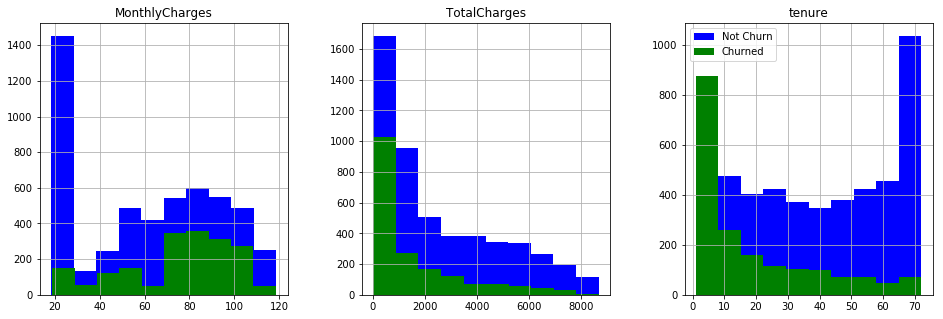

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
clean_data[clean_data.Churn == "No"][numerical_features].hist(color="blue", ax=ax)
clean_data[clean_data.Churn == "Yes"][numerical_features].hist(color="green", ax=ax)
plt.legend(['Not Churn', 'Churned'])

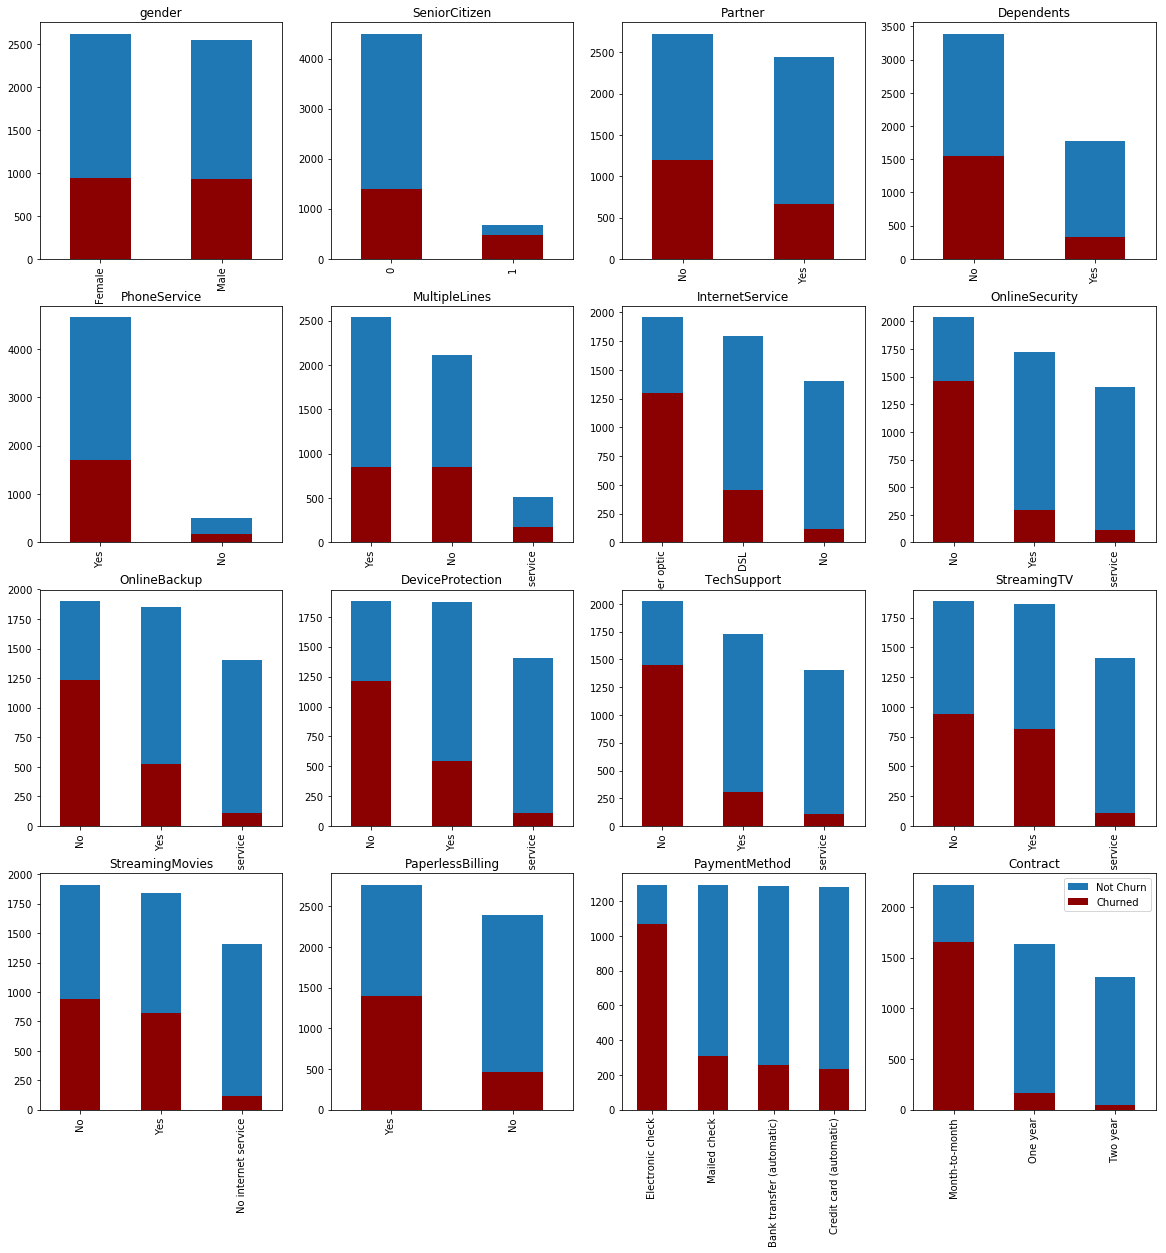

In [10]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling",
    "PaymentMethod",
    "Contract"
]

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 20))
row, col = 0, 0
plt.legend(['Not Churn', 'Churned'])
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    clean_data[clean_data.Churn == "No"][categorical_feature].value_counts().plot('bar', ax=ax[row, col]).set_title(categorical_feature)
    clean_data[clean_data.Churn == "Yes"][categorical_feature].value_counts().plot('bar', ax=ax[row, col], color = "darkred")

plt.legend(['Not Churn', 'Churned'])
plt.savefig('categorical_variable.png')
    

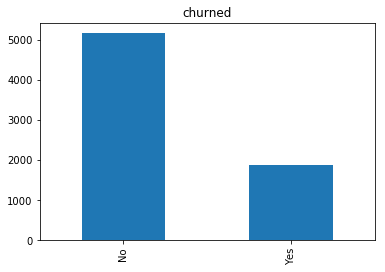

In [11]:
clean_data.Churn.value_counts().plot('bar').set_title('churned')
plt.savefig('churn_variable.png')

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for col in clean_data:
    if clean_data[col].dtypes=='object':
        clean_data[col]=le.fit_transform(clean_data[col].values)
        
clean_data.head(5)

/Users/chenyongng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,2,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,4,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,5,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


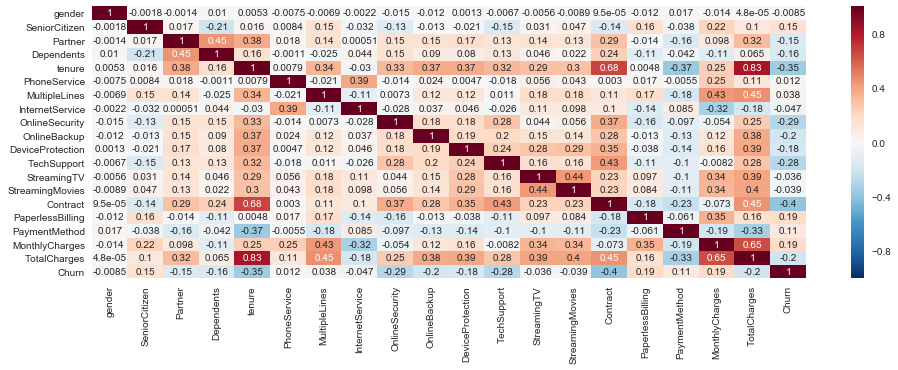

In [13]:
import seaborn as sn
%matplotlib inline

Xy = clean_data.drop(['customerID'], axis=1)
corr = Xy.corr()
plt.figure(figsize = (16,5))
sn.heatmap(corr, annot=True)
plt.savefig('corr_heatmap.png')

In [14]:
from sklearn.model_selection import train_test_split

X,y = clean_data.drop(['Churn','customerID'], axis=1) , clean_data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

logreg1 = LogisticRegression()
logreg1.fit(X_train, y_train)

y_pred = logreg1.predict(X_test)
print("Accuracy of logistic regression classifier: ", logreg1.score(X_test, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
print(precision_recall_fscore_support(y_test, y_pred, average='binary'))

Accuracy of logistic regression classifier:  0.803102111159
1527 184 273 337
(0.64683301343570054, 0.55245901639344264, 0.59593280282935457, None)


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

logreg2 = LogisticRegression()
logreg2.fit(rescaledX_train, y_train)

y_pred2 = logreg2.predict(rescaledX_test)
print("Accuracy of logistic regression classifier: ", logreg2.score(rescaledX_test, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, y_pred2, average='binary')

Accuracy of logistic regression classifier:  0.802671262387
1538 173 285 325


(0.65261044176706828, 0.53278688524590168, 0.58664259927797835, None)

In [17]:
# Remove highly correlated columns (tenure)
X_train3 = X_train.drop(['tenure'], axis=1) 
X_test3 = X_test.drop(['tenure'], axis=1) 
logreg3 = LogisticRegression()
logreg3.fit(X_train3, y_train)

y_pred = logreg3.predict(X_test3)
print("Accuracy of logistic regression classifier: ", logreg3.score(X_test3, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, y_pred, average='binary')

Accuracy of logistic regression classifier:  0.796639379578
1529 182 290 320


(0.63745019920318724, 0.52459016393442626, 0.57553956834532372, None)

In [18]:
# Remove highly correlated columns (tenure, monthly charges)
X_train3 = X_train.drop(['tenure','MonthlyCharges'], axis=1) 
X_test3 = X_test.drop(['tenure','MonthlyCharges'], axis=1) 
logreg3 = LogisticRegression()
logreg3.fit(X_train3, y_train)

y_pred = logreg3.predict(X_test3)
print("Accuracy of logistic regression classifier: ", logreg3.score(X_test3, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, y_pred, average='binary')

Accuracy of logistic regression classifier:  0.784144765187
1528 183 318 292


(0.61473684210526314, 0.47868852459016392, 0.53824884792626737, None)

In [19]:
# Remove highly correlated columns (monthly charges)
X_train3 = X_train.drop(['MonthlyCharges'], axis=1) 
X_test3 = X_test.drop(['MonthlyCharges'], axis=1) 
logreg3 = LogisticRegression()
logreg3.fit(X_train3, y_train)

y_pred = logreg3.predict(X_test3)
print("Accuracy of logistic regression classifier: ", logreg3.score(X_test3, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, y_pred, average='binary')

Accuracy of logistic regression classifier:  0.801809564843
1549 162 298 312


(0.65822784810126578, 0.51147540983606554, 0.57564575645756455, None)

In [20]:
# Remove highly correlated columns (TotalCharges)
X_train3 = X_train.drop(['TotalCharges'], axis=1) 
X_test3 = X_test.drop(['TotalCharges'], axis=1) 
logreg3 = LogisticRegression()
logreg3.fit(X_train3, y_train)

y_pred = logreg3.predict(X_test3)
print("Accuracy of logistic regression classifier: ", logreg3.score(X_test3, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, y_pred, average='binary')

Accuracy of logistic regression classifier:  0.801809564843
1536 175 285 325


(0.65000000000000002, 0.53278688524590168, 0.5855855855855856, None)

In [21]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.415349
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4711
Model:                          Logit   Df Residuals:                     4692
Method:                           MLE   Df Model:                           18
Date:                Sat, 08 Feb 2020   Pseudo R-squ.:                  0.2845
Time:                        16:18:55   Log-Likelihood:                -1956.7
converged:                       True   LL-Null:                       -2734.7
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
gender              -0.0583      0.078     -0.751      0.452      -0.210       0.094
SeniorCitiz

/Users/chenyongng/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [22]:
insignificant_column = ['gender','MultipleLines','StreamingTV','StreamingMovies','PaymentMethod']
# Remove statiscally insignificant columns
X_train4 = X_train.drop(insignificant_column, axis=1) 
X_test4 = X_test.drop(insignificant_column, axis=1) 
logreg4 = LogisticRegression()
logreg4.fit(X_train4, y_train)

y_pred = logreg4.predict(X_test4)
print("Accuracy of logistic regression classifier: ", logreg4.score(X_test4, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, y_pred, average='binary')

Accuracy of logistic regression classifier:  0.802240413615
1526 185 274 336


(0.6449136276391555, 0.55081967213114758, 0.59416445623342184, None)

In [23]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train.drop(insignificant_column, axis=1) )
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.415502
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 4711
Model:                          Logit   Df Residuals:                     4697
Method:                           MLE   Df Model:                           13
Date:                Sat, 08 Feb 2020   Pseudo R-squ.:                  0.2842
Time:                        16:18:55   Log-Likelihood:                -1957.4
converged:                       True   LL-Null:                       -2734.7
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
SeniorCitizen        0.2002      0.102      1.956      0.050      -0.000       0.401
Partner    

In [24]:
insignificant_column = ['gender','MultipleLines','StreamingTV','StreamingMovies','PaymentMethod','Partner']
# Remove statiscally insignificant columns
X_train4 = X_train.drop(insignificant_column, axis=1) 
X_test4 = X_test.drop(insignificant_column, axis=1) 
logreg4 = LogisticRegression()
logreg4.fit(X_train4, y_train)

y_pred = logreg4.predict(X_test4)
print("Accuracy of logistic regression classifier: ", logreg4.score(X_test4, y_test))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, y_pred, average='binary')

Accuracy of logistic regression classifier:  0.803102111159
1526 185 272 338


(0.64627151051625242, 0.5540983606557377, 0.59664607237422773, None)

In [25]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20, seed=123)

# Fit the classifier to the training set
xg_cl.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, preds, average='binary')

accuracy: 0.797932
1584 127 342 268


(0.6784810126582278, 0.43934426229508194, 0.53333333333333333, None)

In [26]:
# Instantiate the XGBClassifier: xg_cl
xg_cl2 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20, seed=123)

# Fit the classifier to the training set
xg_cl2.fit(rescaledX_train, y_train)

# Predict the labels of the test set: preds
preds2 = xg_cl2.predict(rescaledX_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds2==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

tn, fp, fn, tp = confusion_matrix(y_test, preds2).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, preds2, average='binary')

accuracy: 0.797501
1585 126 344 266


(0.6785714285714286, 0.43606557377049182, 0.53093812375249505, None)

In [27]:
# Instantiate the XGBClassifier: xg_cl
xg_cl3 = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20, seed=123)

# Fit the classifier to the training set
xg_cl3.fit(X_train.drop(insignificant_column, axis=1) , y_train)

# Predict the labels of the test set: preds
preds3 = xg_cl3.predict(X_test.drop(insignificant_column, axis=1) )

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds3==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

tn, fp, fn, tp = confusion_matrix(y_test, preds3).ravel()
print(tn, fp, fn, tp)
precision_recall_fscore_support(y_test, preds3, average='binary')

accuracy: 0.796209
1580 131 342 268


(0.67167919799498743, 0.43934426229508194, 0.53121902874132798, None)